In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from numba import jit
from utility import *

In [3]:
#@jit(nopython=True)
def k_means(points, K):
    N = points.shape[0]
    dimension = points.shape[1]
    #inizializzazione dei centroidi in corrispondenza di K punti 
    centroids = np.zeros((K,dimension))
    clusters = np.zeros(N)
    choices = np.arange(N)
    for i in range(K):
        choice = np.random.randint(len(choices))
        centroids[i] = points[choice].copy()#centroids_list[i]
        choices = np.delete(choices, choice)
    finito = False
    iter = 0
    while(finito == False):
        for i in range(N):
            dist = -1
            centroid = -1
            for c in range(K):
                dist_c = np.linalg.norm(centroids[c]-points[i])
                if(dist_c < dist or dist == -1):
                    centroid = c
                    dist = dist_c
            clusters[i] = centroid        
        old_centroids = centroids.copy()

        for i in range(K): #calcolo nuovi centroidi
            centroids[i] = np.zeros(dimension)
            n_elem = 0
            for j in range(N):
                if clusters[j] == i:
                    n_elem = n_elem+1
                    centroids[i] = centroids[i] + points[j]
            if(n_elem == 0):
                centroids[i] = points[np.random.randint(len(choices))].copy()
            else:
                centroids[i] = centroids[i] / n_elem

        iter = iter + 1
        if((old_centroids == centroids).all()):
            finito = True
                


    return clusters, centroids

In [41]:
points = load_points('C:/Users/franc/Desktop/prova.txt')
#points = np.random.randn(100,2)
N = len(points)
K = 15

sol, centroids = k_means(points, K)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

1.32581E+13


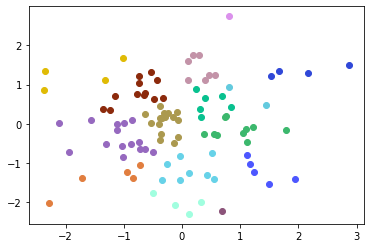

In [7]:
printR2sol(points, sol, K)

100%|██████████| 19/19 [00:24<00:00,  1.31s/it]


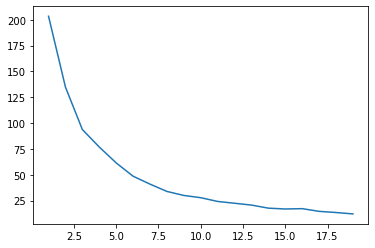

In [18]:
from tqdm import tqdm

values = []
L = int(N/5)
for i in tqdm(range(1,L)):
    best_val = 0
    for j in range(10):
        clusters, centroids = k_means(points, i)
        val = squared_inner_distance(clusters, points, i)
        if( val < best_val or j == 0):
            best_val = val
    values.append(best_val)

plt.plot(range(1,L), values)



In [37]:
def elbow_method(values):
    values = np.array(values)
    values = values/np.max(values)
    diffs = (values[:-1]-values[1:])/values[:-1]
    print(diffs)
    diffs = diffs[:-1] - diffs[1:]
    print(diffs)

    return np.argmax(diffs) + 1

In [38]:
print(f"Il valore ottimo di cluster per questo problema è {elbow_method(values)}")

[ 0.33713419  0.3048596   0.18041683  0.20004731  0.20963433  0.15796289
  0.1727057   0.11531342  0.07222879  0.13095945  0.07241448  0.07889317
  0.14400795  0.04676243 -0.02073595  0.15328431  0.07704043  0.10103487]
[ 0.03227458  0.12444277 -0.01963048 -0.00958702  0.05167145 -0.01474281
  0.05739228  0.04308463 -0.05873066  0.05854497 -0.00647869 -0.06511477
  0.09724551  0.06749838 -0.17402026  0.07624388 -0.02399444]
Il valore ottimo di cluster per questo problema è 2
